# Parse Curated CubIXSS Line List

Athiray curated a line list for both MOXSI and SASS. This notebook cleans up this line list a bit and builds it into a machine readable format.
It also adds a few additional lines.

In [1]:
import fiasco
import astropy.io.ascii
import copy
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

## Additional Lines

In [2]:
si14 = fiasco.Ion('Si XIV', np.logspace(6,8,10000)*u.K)
goft_si14 = si14.contribution_function(1e9*u.cm**(-3))
# I selected this particular transition from the more complete line list
transition = 6.1803998947143555  * u.AA
i_transition = np.argmin(np.fabs(si14.transitions.wavelength[~si14.transitions.is_twophoton] - transition))
goft_si14_select = goft_si14[..., i_transition].squeeze()

(1e-28, 1e-24)

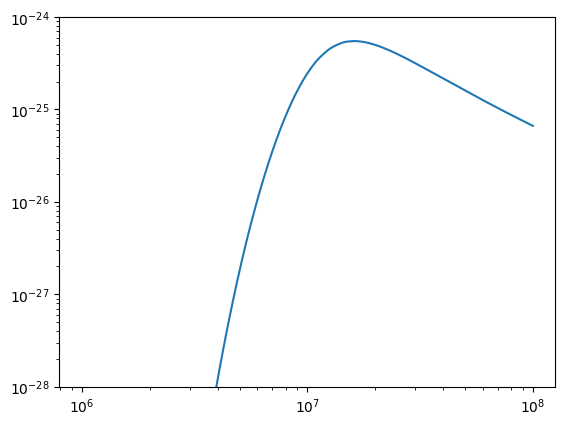

In [3]:
plt.plot(si14.temperature, goft_si14_select)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-28,1e-24)

## Parse Table

In [4]:
def parse_grid_table(text):
    import docutils.statemachine
    import docutils.parsers.rst.tableparser
    # Clean up the input: get rid of empty lines and strip all leading and
    # trailing whitespace.
    lines = filter(bool, (line.strip() for line in text.splitlines()))
    parser = docutils.parsers.rst.tableparser.GridTableParser()
    return parser.parse(docutils.statemachine.StringList(list(lines)))

In [5]:
athiray_line_table = """
+------+---------------+-------+----------+--------+---------+-------+
| **I  | **Wavelength  | **Di  | **Inst** | **Peak | **Peak  | **Sen |
| on** | (A)**         | agnos |          | Emis   | Emi     | sitiv |
|      |               | tic** |          | sivity | ssivity | ity** |
|      |               |       |          | Temp   | Temp    |       |
|      |               |       |          | (Maxw  | (k=2)** |       |
|      |               |       |          | ell)** |         |       |
+======+===============+=======+==========+========+=========+=======+
| Fe   | 1.86          | T     | SASS     | 7.5    | 7.5     | FL    |
| XXV  |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Ca   | 3.21          | T     | SASS     | 7.4    | 7.5     | FL    |
| XIX  |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Si   | 6.74          | T     | SAS      | 7.     | 7.1     | FL    |
| XIII |               |       | S/MOXSI? |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Mg   | 8.419         | T     | SAS      | 7.     | 7.2     | FL    |
| XII  |               |       | S/MOXSI? |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Mg   | 9.169, 9.314  | T     | MOXSI    | 6.8    | 7.0     | FL/AR |
| XI   |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Fe   | 11.2          | T, κ  | MOXSI    | 6.8    | 6.9     | FL/AR |
| XVII | 5,15.015,15.2 |       |          |        |         |       |
|      | 5,16.78,17.05 |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Fe   | 12.83         | T     | MOXSI    | 7      | 7.2     | FL    |
| XX   |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Ne   | 13.447,13.669 | T, κ  | MOXSI    | 6.6    | 6.7     | FL/AR |
| IX   |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Fe   | 13.53         | T     | MOXSI    | 7.     | 7.2     | FL    |
| XIX  |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Fe   | 14.204,       | T, κ  | MOXSI    | 6.9    | 7.      | FL/AR |
| X    | 17.621        |       |          |        |         |       |
| VIII |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| O    | 18.967,       | T, κ, | MOXSI    | 6.5    | 6.6     | FL/AR |
| VIII | 16.006        | n     |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| O    | 21.60, 21.81, | T, κ, | MOXSI    | 6.3    | 6.4     | FL/AR |
| VII  | 22.10, 18.67  | n     |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| N    | 24.77         | T     | MOXSI    | 6.3    | 6.5     | FL/AR |
| VII  |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| C VI | 33.73         | T     | MOXSI    | 6.1    | 6.3     | AR    |
+------+---------------+-------+----------+--------+---------+-------+
| C V  | 40.27         | T     | MOXSI    | 6.     | 6.1     | AR    |
+------+---------------+-------+----------+--------+---------+-------+
| Si   | 44.16         | T     | MOXSI    | 6.3    | 6.5     | FL/AR |
| XII  |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Si   | 49.18         | T     | MOXSI    | 6.2    | 6.3     | AR    |
| XI   |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Fe   | 11.171        | T     | SASS?/   | 7.3    | 7.5     | FL    |
| XXIV |               |       | MOXSI    |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Fe   | 11.737        | T     | SASS?/   | 7.2    | 7.5     | FL    |
| X    |               |       | MOXSI    |        |         |       |
| XIII |               |       |          |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+
| Ne X | 12.137        | T     | SASS?/   | 6.8    | 6.9     | FL/AR |
|      |               |       | MOXSI    |        |         |       |
+------+---------------+-------+----------+--------+---------+-------+

"""

In [6]:
# This is parsed from an RST version of the table that was curated by Athiray
parsed_rst = parse_grid_table(athiray_line_table)
column_names = [''.join(col[-1]) for col in parsed_rst[1][0]]
column_names = [n[2:-2] for n in column_names]
rows = []
for _row in parsed_rst[2]:
    row = [''.join(col[-1]) for col in _row]
    rows.append(row)
line_table = astropy.table.QTable(rows=rows, names=column_names)
# Split out rows with multiple transitions into a new table
new_rows = []
rows_to_remove = []
for row in line_table:
    if len(wavelengths:=row['Wavelength(A)'].split(',')) > 1:
        for wave in wavelengths:
            new_row = copy.deepcopy(row)
            new_row['Wavelength(A)'] = wave
            new_rows.append(new_row)
        rows_to_remove.append(row.index)
new_rows = astropy.table.vstack(new_rows)
line_table.remove_rows(rows_to_remove)
line_table = astropy.table.vstack([line_table, new_rows])
line_table.rename_columns(
    ['Ion','Wavelength(A)', 'PeakEmissivityTemp(Maxwell)', 'PeakEmissivityTemp(k=2)'],
    ['ion name','wavelength', 'T_max (Maxwellian)', 'T_max (kappa=2)']
)
line_table = astropy.table.QTable(line_table,dtype=[str,float,str,str,float,float,str])
# Fix inconsistent spacing in ion names
def fix_ion_name_string(name):
    components = name.split(' ')
    if len(components) == 2:
        return name
    if name[1] == name[1].lower():
        i_sep = 2
    else:
        i_sep = 1
    return f'{name[:i_sep]} {name[i_sep:]}'
line_table['ion name'] = list(map(fix_ion_name_string, line_table['ion name']))
line_table['wavelength'].unit = 'Angstrom'
line_table['T_max (Maxwellian)'] = 10**line_table['T_max (Maxwellian)'] * u.K
line_table['T_max (kappa=2)'] = 10**line_table['T_max (kappa=2)'] * u.K
# Split up Diagnostic column
def does_row_contain(x, col):
    return list(map(lambda _x: x in _x, col))
line_table['temperature diagnostic'] = does_row_contain('T', line_table['Diagnostic'])
line_table['density diagnostic'] = does_row_contain('n', line_table['Diagnostic'])
line_table['kappa diagnostic'] = does_row_contain('κ', line_table['Diagnostic'])
# Split up Instrument column
line_table['sass'] = does_row_contain('SASS', line_table['Inst'])
line_table['moxsi'] = does_row_contain('MOXSI', line_table['Inst'])
# Split up Sensitivity column
line_table['flare line'] = does_row_contain('FL', line_table['Sensitivity'])
line_table['active region line'] = does_row_contain('AR', line_table['Sensitivity'])
# Remove all composite columns
line_table.remove_columns(['Diagnostic', 'Inst', 'Sensitivity'])
# Add additional columns here
line_table.add_row({
    'ion name': 'Si XIV',
    'wavelength': si14.transitions.wavelength[~si14.transitions.is_twophoton][i_transition],
    'T_max (Maxwellian)': si14.temperature[goft_si14_select.argmax()],
    'T_max (kappa=2)': np.nan * u.K,
    'temperature diagnostic': True,
    'density diagnostic': False,
    'kappa diagnostic': False,
    'sass': True,
    'moxsi': True,
    'flare line': True,
    'active region line': True,
})
# This should be done last
line_table.sort('wavelength')
# Add metadata
line_table.meta['comment'] = "This line list was originally curated by P.S. Athiray on 10/23, starting with the original line list from the CubIXSS. Determinations of Kappa sensitivity are based on Dudík et al. (2019); kappa temperatures are computed using the KAPPA database."

In [7]:
line_table

ion name,wavelength,T_max (Maxwellian),T_max (kappa=2),temperature diagnostic,density diagnostic,kappa diagnostic,sass,moxsi,flare line,active region line
,Angstrom,K,K,,,,,,,
str8,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Fe XXV,1.86,31622776.60168379,31622776.60168379,True,False,False,True,False,True,False
Ca XIX,3.21,25118864.315095823,31622776.60168379,True,False,False,True,False,True,False
Si XIV,6.1804,16185305.906356486,nan,True,False,False,True,True,True,True
Si XIII,6.74,10000000.0,12589254.117941663,True,False,False,True,True,True,False
Mg XII,8.419,10000000.0,15848931.924611142,True,False,False,True,True,True,False
Mg XI,9.169,6309573.44480193,10000000.0,True,False,False,False,True,True,True
Mg XI,9.314,6309573.44480193,10000000.0,True,False,False,False,True,True,True
Fe XXIV,11.171,19952623.149688788,31622776.60168379,True,False,False,True,True,True,False


In [8]:
line_table.write('../data/line_lists/curated_line_list.asdf')

TODO: augment this list with some of the lower-energy lines > 40 Angstroms, particularly those from Fe XIV, XV, XVI